In [2]:
from skimage import io, transform, color, exposure
from skimage.feature import hog
from commonfunctions import *
from skimage.color import rgb2gray, rgb2hsv
from scipy.signal import convolve2d
import numpy as np
import cv2


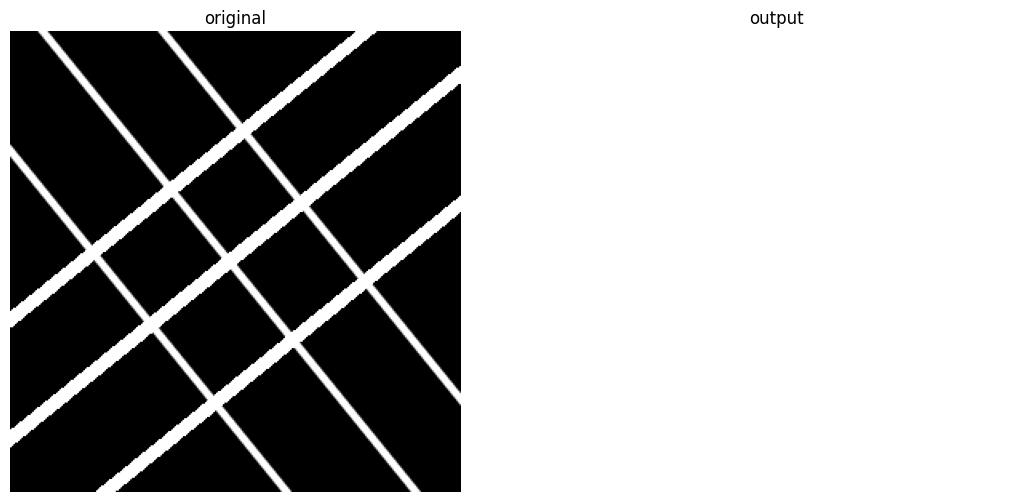

In [3]:
# apply hough transform to detect lines  with  135   degree  angle
def hough_lines(img):
    output = np.zeros_like(img)

    # 1- edge detection
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    
    # 2- hough transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    
    # 3- draw lines on the image
    for line in lines:
        rho, theta = line[0]
        if theta > 1.5:
            continue
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))

        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return output

image = io.imread('Q1.png')
output = hough_lines(image)
show_images([image, output], ['original', "output"])

In [17]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np

# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread('Q1.png')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	print(r, theta)
	
	# Stores the value of cos(theta) in a
	a = np.cos(theta)

	# Stores the value of sin(theta) in b
	b = np.sin(theta)

	# x0 stores the value rcos(theta)
	x0 = a*r

	# y0 stores the value rsin(theta)
	y0 = b*r

	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
	x1 = int(x0 + 1000*(-b))

	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
	y1 = int(y0 + 1000*(a))

	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
	x2 = int(x0 - 1000*(-b))

	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
	y2 = int(y0 - 1000*(a))

	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
	# (0,0,255) denotes the colour of the line to be
	# drawn. In this case, it is red.

    # deg to radian = deg * pi / 180
	if theta > 2.3:
	    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

	
cv2.imwrite('linesDetected.jpg', img)


200.0 0.890117883682251
195.0 0.890117883682251
-18.0 2.460914134979248
258.0 0.890117883682251
142.0 0.890117883682251
137.0 0.890117883682251
-72.0 2.460914134979248
263.0 0.890117883682251
-13.0 2.460914134979248
49.0 2.460914134979248


True

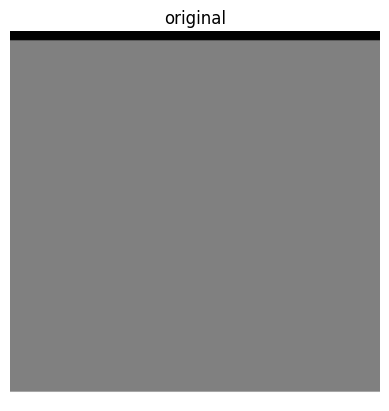

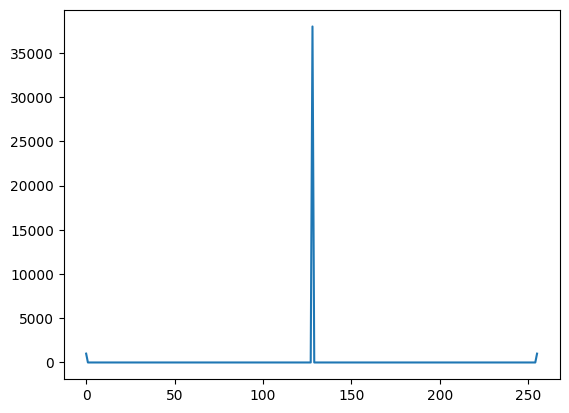

In [21]:
image = np.zeros((200, 200))
image[0:5, :] = 0
image[5:-5,:] = .5
image[-5:, :] = 1

show_images([image], ['original'])

# show histogram
hist, bins = exposure.histogram(image)
plt.plot(hist)
plt.show()


